<a href="https://colab.research.google.com/github/BurhanAmir/Machine-Learning-Project/blob/main/ibm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Initial Setup | Importing necessary Libraries\**

In [21]:
# Run in a Jupyter cell or script

import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np    # linear algebra
import seaborn as sns # For creating plots
import matplotlib.pyplot as plt
import os
import gdown
import plotly.graph_objects as go
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix)
from plotly.subplots import make_subplots

# For reproducibility
RANDOM_SEED = 42

**Mounting Drive\**

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing dataset through drive.\**

In [23]:
# Downloading dataset file from google drive.
!pip install --quiet gdown

# File ID from the shared link
dataset_id = "1j8dxLoIHIel8J8DY36xUyT-BO37-zvZo"
url = f"https://drive.google.com/uc?id={dataset_id}"
output = "dataset.csv"

# Download only if not already downloaded
if not os.path.exists(output):
    print("⏬ Downloading dataset from Google Drive …")
    gdown.download(url, output, quiet=False)
else:
    print("✅ Dataset already exists locally – skipping download.")

# Load into pandas DataFrame
df = pd.read_csv(output)

# Quick check
print("✅ Dataset loaded. Here are first few rows:")
print(df.head())


✅ Dataset already exists locally – skipping download.
✅ Dataset loaded. Here are first few rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic       

**Few enteries of the datset.\**

In [24]:
display(df.head(100))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8637-XJIVR,Female,0,No,No,12,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,78.95,927.35,Yes
96,9803-FTJCG,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,One year,Yes,Credit card (automatic),66.85,4748.7,No
97,0278-YXOOG,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,21.05,113.85,Yes
98,3212-KXOCR,Male,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),21.00,1107.2,No


**All of the unique values of the variables (dataset columns).**

In [25]:
for i in df.columns:
    print(f"{i}: {df[i].unique()}")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)

**General insights about data.\**     EDA (Explorartory Data Analysis)

In [26]:
# Quick info
print(df.shape)
print(df.columns.tolist())

print("\n Basic Info Before Fixing Data Types:\n")
print(df.info()) # Check basic info about dataset
df.describe(include='all').T


(7043, 21)
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

 Basic Info Before Fixing Data Types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


data cleaning

**Data Manipulation and Cleaning**

In [27]:
# STEP 1: Fix Data Types and Handle Missing Values (Updated - No Warning)

# Convert 'TotalCharges' to numeric (it often has blank spaces)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Optional improvement: estimate missing TotalCharges using MonthlyCharges * tenure
mask = df['TotalCharges'].isna() & (df['tenure'] > 0)
df.loc[mask, 'TotalCharges'] = df.loc[mask, 'MonthlyCharges'] * df.loc[mask, 'tenure']


#  Check missing values after conversion
print("\nMissing Values After Type Fix:\n")
print(df.isnull().sum())

# 4️⃣ Handle missing values safely (no inplace warning)
for col in df.columns:
    if df[col].dtype == 'object':  # categorical
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
    else:  # numeric
        mean_val = df[col].mean()
        df[col] = df[col].fillna(mean_val)

# 5️⃣ Confirm no missing values remain
print("\nMissing Values After Fix:\n")
print(df.isnull().sum())

# 6️⃣ Double check all data types
print("\nData Types After Fixing:\n") # Now TotalCharges is representing correct data type (float)
print(df.dtypes)



Missing Values After Type Fix:

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Missing Values After Fix:

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Chu

**Converting the target label into binary**

In [28]:
# 7️⃣ Convert target column 'Churn' to numeric (Yes=1, No=0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Check final distribution
print("\nChurn value counts:\n", df['Churn'].value_counts(dropna=False))



Churn value counts:
 Churn
0    5174
1    1869
Name: count, dtype: int64


**encoding (OneHotEncoder) + clean feature setup**

In [30]:
# STEP 2: Encoding Fix (OneHotEncoder) + Feature Setup

# 1) Split features and target
X = df.drop(columns=['Churn'])
y = df['Churn']


# Drop useless ID column
X = X.drop(columns=['customerID'])


# 2) Identify column types (simple, automatic)
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

# 3) Build a simple preprocessing block:
#    - Numeric: fill missing with mean, then scale (helps Logistic Regression)
#    - Categorical: fill missing with most frequent, then One-Hot encode
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ],
    remainder='drop'  # keep it simple: only use the specified columns
)

# 4) Quick preview to make sure encoding works (no training yet)
preprocessor.fit(X)
X_preview = preprocessor.transform(X)

print("\nAfter encoding + scaling:")
print("Shape (rows, features):", X_preview.shape)

# 5) Optional: show first 5 transformed rows (small preview)
print("\nFirst 2 rows of transformed features (rounded):")
print(np.round(X_preview[:2], 3))

# 6) Optional: show feature names (if sklearn version supports it)
try:
    feature_names = preprocessor.get_feature_names_out()
    print("\nTotal feature count:", len(feature_names))
    print("Sample feature names:", feature_names[:15])
except Exception as e:
    print("\nFeature names not available in this sklearn version. That's okay.")


Numeric columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

After encoding + scaling:
Shape (rows, features): (7043, 45)

First 2 rows of transformed features (rounded):
[[-0.44  -1.277 -1.16  -0.995  1.     0.     0.     1.     1.     0.
   1.     0.     0.     1.     0.     1.     0.     0.     1.     0.
   0.     0.     0.     1.     1.     0.     0.     1.     0.     0.
   1.     0.     0.     1.     0.     0.     1.     0.     0.     0.
   1.     0.     0.     1.     0.   ]
 [-0.44   0.066 -0.26  -0.174  0.     1.     1.     0.     1.     0.
   0.     1.     1.     0.     0.     1.     0.     0.     0.     0.
   1.     1.     0.     0.     0.     0.     1.     1.     0.     0.
   1.     0.     0.     1.  

**eda**

Dataset shape: (7043, 21)

First 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1



Basic statistics:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.265370
std,0.368612,24.559481,30.090047,2265.000258,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000
50%,0.000000,29.000000,70.350000,1400.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000



Missing values (should be none now):
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


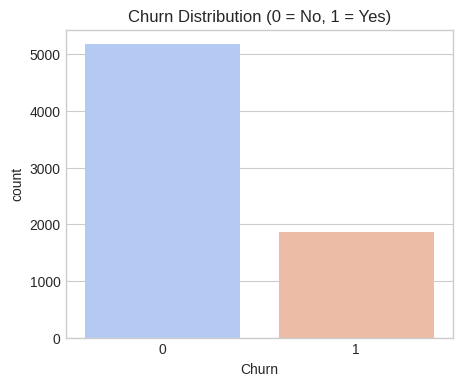

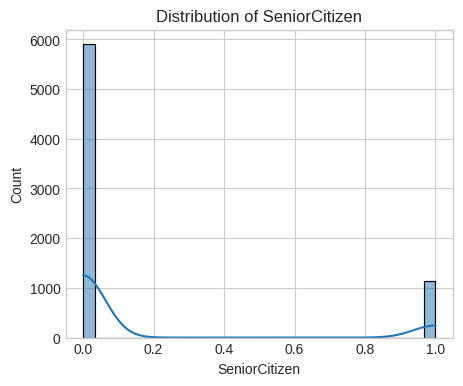

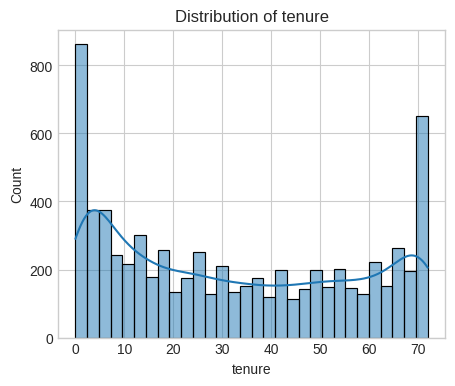

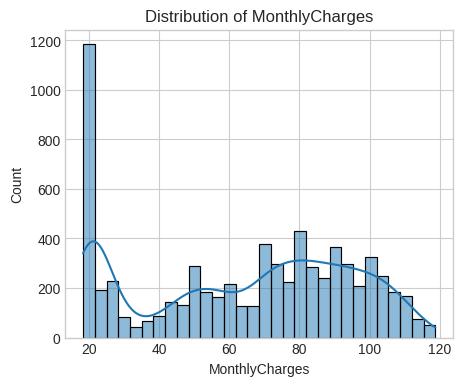

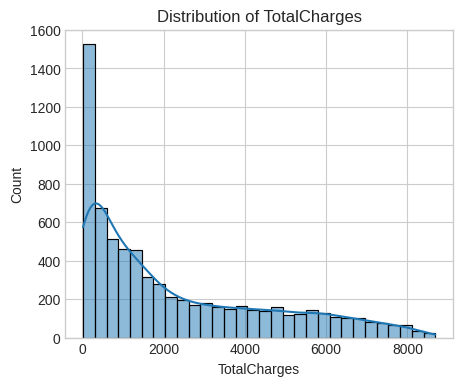

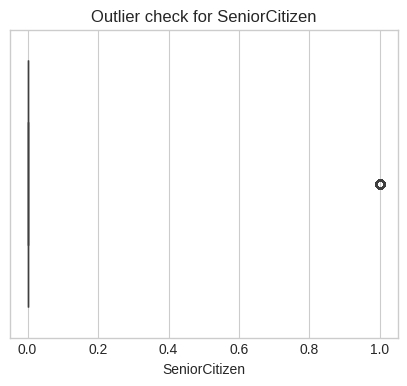

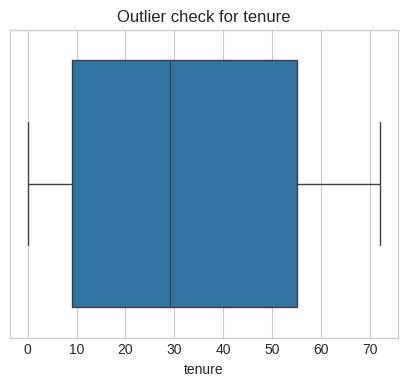

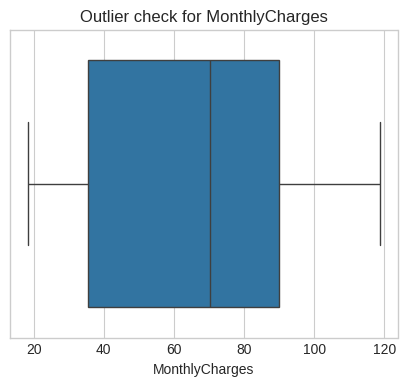

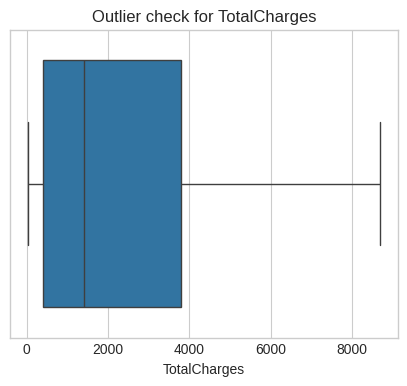

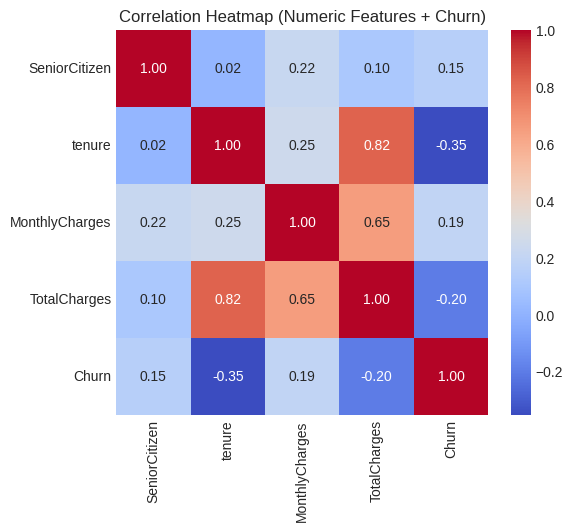

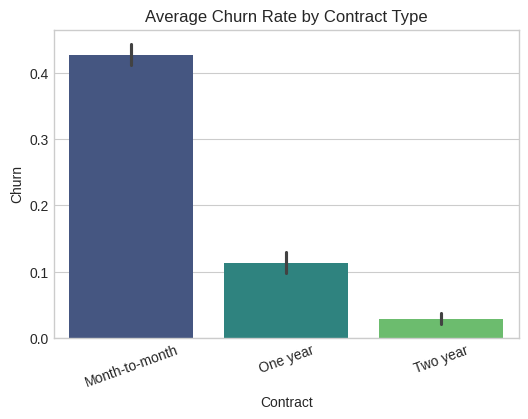

In [34]:
# STEP 3: Exploratory Data Analysis (EDA)

plt.style.use('seaborn-v0_8-whitegrid') # Make plots look cleaner

# 1️⃣ Quick look at dataset
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nBasic statistics:")
display(df.describe())

print("\nMissing values (should be none now):")
print(df.isnull().sum())

# 2️⃣ Churn distribution
plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df, hue='Churn', palette='coolwarm', legend=False)
plt.title("Churn Distribution (0 = No, 1 = Yes)")
plt.show()

# 3️⃣ Numeric columns distribution
numeric_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

for col in numeric_cols:
    plt.figure(figsize=(5,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# 4️⃣ Boxplots to spot outliers
for col in numeric_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier check for {col}")
    plt.show()

# 5️⃣ Correlation heatmap (numerical columns only)
plt.figure(figsize=(6,5))
sns.heatmap(df[numeric_cols + ['Churn']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features + Churn)")
plt.show()

# 6️⃣ Simple insight check: average churn by contract type
plt.figure(figsize=(6,4))
sns.barplot(x='Contract', y='Churn', hue='Contract', data=df, palette='viridis', legend=False)
plt.title("Average Churn Rate by Contract Type")
plt.xticks(rotation=20)
plt.show()


**Assigning the datatypes to the variables [columns], so they can be trained and processed**

In [ ]:
# Dropping the CustomerID (identifier)
df = df.drop(columns=['customerID'])

# Numeric features
num_features = ['tenure','MonthlyCharges','TotalCharges']
binary_features_yesno = ['Partner','Dependents','PhoneService','PaperlessBilling'] # These variables had only yes or no entries, they qualify for binary classification.

# All remaining object columns -> categorical to one-hot
cat_features = df.select_dtypes(include=['object']).columns.tolist()               # Senior Citizen and Churn wont be added, as they are already in binary.
cat_features = [c for c in cat_features if c not in binary_features_yesno]         # Removing any columns which are binary already or the ones which are already done.

print("Numerical:", num_features)
print("Binary (Yes/No to map):", binary_features_yesno)
print("Categorical (one-hot):", cat_features)


Numerical: ['tenure', 'MonthlyCharges', 'TotalCharges']
Binary (Yes/No to map): ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
Categorical (one-hot): ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


In [ ]:
df[cat_features].describe()

,gender,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,3,3,3,3,3,3,3,3,3,4
top,Male,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check
freq,3555,3390,3096,3498,3088,3095,3473,2810,2785,3875,2365


**Mapping the values to numerical format. Here 1 represent yes and 0 represent no.**

In [ ]:
for c in binary_features_yesno:
    df[c] = df[c].map({'Yes':1, 'No':0})

# Some categorical columns may have 'No internet service' or 'No phone service' categories.
# They will be handled by OneHotEncoder.

**EDA (Explorartory Data Analysis) with Visual Plots **

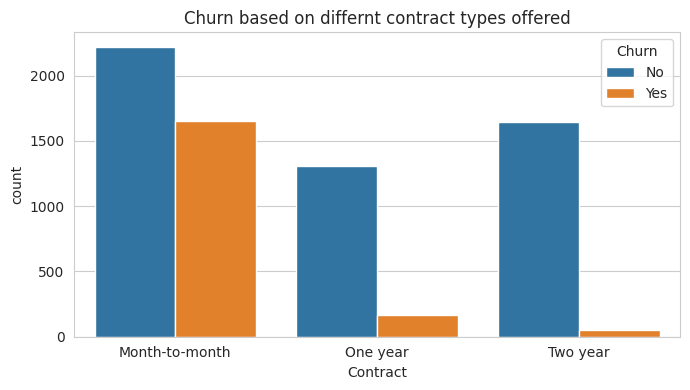

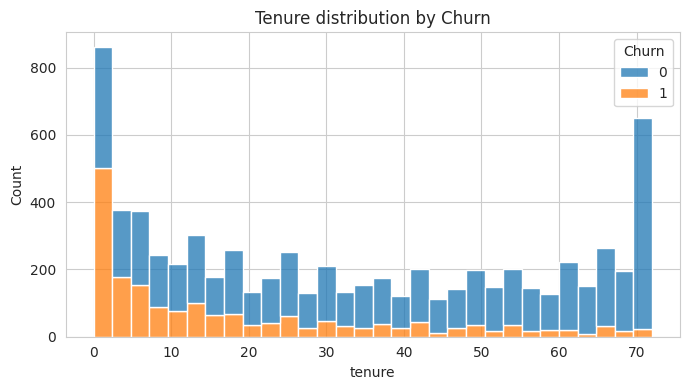

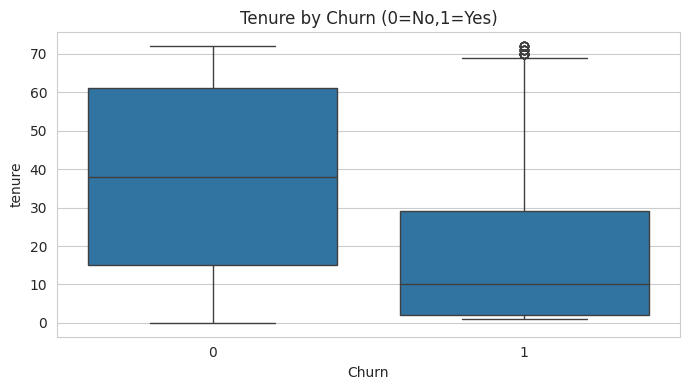

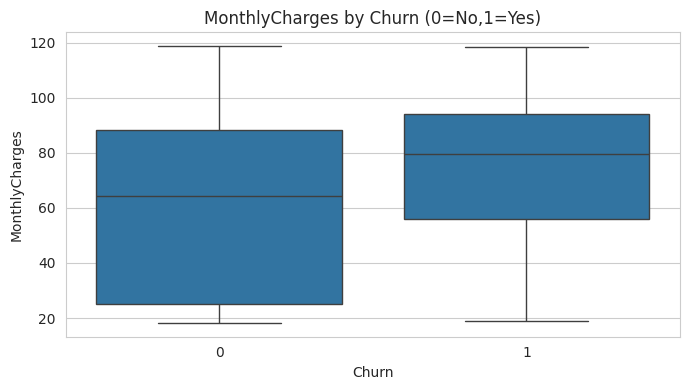

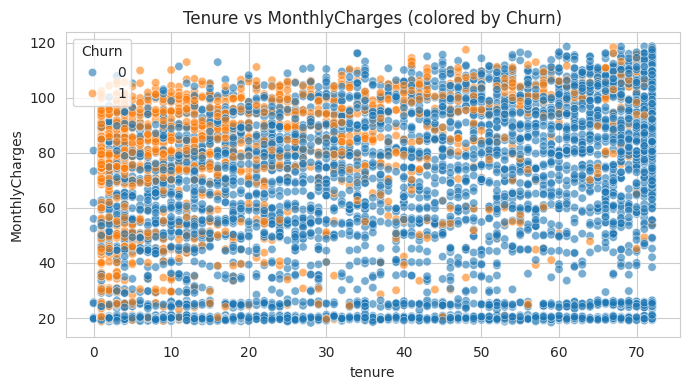

In [ ]:
# Churn by Contract Type
sns.set_style("whitegrid")
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Churn based on differnt contract types offered")
plt.xlabel("Contract")
plt.legend(title='Churn', labels=['No','Yes'])
plt.tight_layout()
plt.show()

# Tenure vs Churn: show distribution of tenure grouped by churn
plt.figure(figsize=(7,4))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title("Tenure distribution by Churn")
plt.tight_layout()
plt.show()

# Or boxplot: tenure by churn
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title("Tenure by Churn (0=No,1=Yes)")
plt.tight_layout()
plt.show()

# MonthlyCharges vs Churn (boxplot + swarm for detail)
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("MonthlyCharges by Churn (0=No,1=Yes)")
plt.tight_layout()
plt.show()

# Scatter Tenure vs MonthlyCharges colored by churn
plt.figure(figsize=(7,4))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', alpha=0.6)
plt.title("Tenure vs MonthlyCharges (colored by Churn)")
plt.tight_layout()
plt.show()


**Train and Split Dataset 70% for training, 30% for testing**

In [ ]:
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=RANDOM_SEED, stratify=y)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)
print("Churn distribution train:", y_train.mean(), " test:", y_test.mean())


Train size: (4930, 19)
Test size: (2113, 19)
Churn distribution train: 0.2653144016227181  test: 0.26549929010885


**Pre-processing (pipeline) + Logistic Regression**

In [ ]:
# Recompute lists for pipeline based on X_train dtypes
numeric_features = ['tenure','MonthlyCharges','TotalCharges']
# binary features already numeric: keep them in numeric_features or treat separately.
binary_features = ['Partner','Dependents','PhoneService','PaperlessBilling']
# Now categorical (object dtype)
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

print("numeric:", numeric_features)
print("binary:", binary_features)
print("categorical:", categorical_features)

# Column transformer:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features + binary_features),  # scale numerics + binary
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Pipeline with LogisticRegression
pipe = Pipeline(steps=[
    ('preproc', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, random_state=RANDOM_SEED))
])

# Fit baseline model
pipe.fit(X_train, y_train)

numeric: ['tenure', 'MonthlyCharges', 'TotalCharges']
binary: ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
categorical: ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'PaperlessBilling']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaymentMethod'])])),
                ('clf', LogisticRegression(max_iter=1000, random_state=42))])

**Prediction**

🔍 Model Evaluation Summary:
Accuracy:  80.55% (0.8055)
Precision: 65.76% (0.6576)
Recall:    55.79% (0.5579)
F1 Score:  60.37% (0.6037)
ROC-AUC:   84.40% (0.8440)

✅ The model is performing quite well (above 80% accuracy).

Classification Report:

              precision    recall  f1-score   support

    No Churn       0.85      0.89      0.87      1552
       Churn       0.66      0.56      0.60       561

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



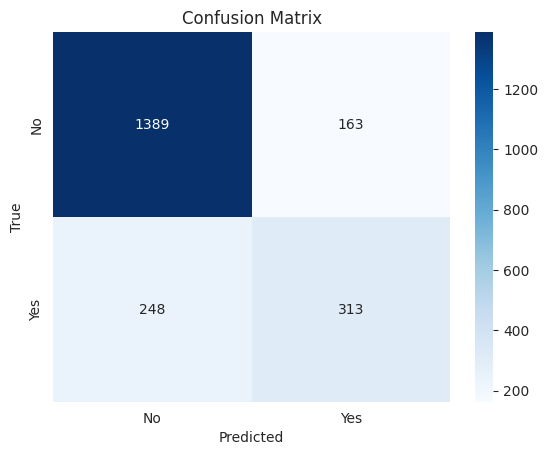

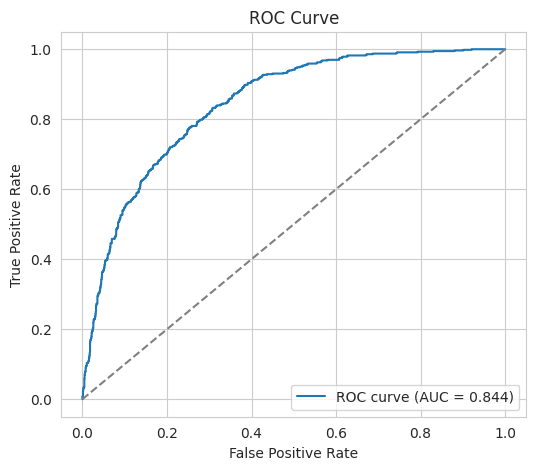

In [ ]:
# Predictions
y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rocauc = roc_auc_score(y_test, y_proba)

# Display results
print(" Beloe is the model Evaluation Summary:")
print(f"Accuracy:  {acc*100:.2f}% ({acc:.4f})")
print(f"Precision: {prec*100:.2f}% ({prec:.4f})")
print(f"Recall:    {rec*100:.2f}% ({rec:.4f})")
print(f"F1 Score:  {f1*100:.2f}% ({f1:.4f})")
print(f"ROC-AUC:   {rocauc*100:.2f}% ({rocauc:.4f})")

# Optional quick verdict
if acc > 0.8:
    print("\n The model is performing quite well (above 80% accuracy).")
elif acc > 0.7:
    print("\n The model is acceptable but has room for improvement.")
else:
    print("\n The model accuracy is low — might need tuning or more features.")



# Full classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['No Churn','Churn']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {rocauc:.3f})')
plt.plot([0,1], [0,1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

